In [16]:
from GNN import GNN
from run_GNN import get_optimizer, test,  train, main
from best_params import best_params_dict
from data import get_dataset
from utils import ROOT_DIR
import numpy as np
import matplotlib.pyplot as plt
opt = np.load('cora_arg.npy',allow_pickle=True).tolist()


def plot_state(init_state,final_state):
    fig, ax = plt.subplots(2)
    ax[0].scatter(init_state[:,0].cpu().numpy(),init_state[:,1].cpu().numpy())
    ax[1].scatter(final_state[:,0].cpu().numpy(),final_state[:,1].cpu().numpy())
    ax[1].set_xlim(-3,3)
    ax[1].set_ylim(-3,3)
    ax[0].set_xlim(-3,3)
    ax[0].set_ylim(-3,3)
    # plt.xlim(-1,1)

## GCN +Neural ODE

In [8]:
opt['channel_mixing'] = False

In [17]:
opt['function'] = 'GCN'
opt['time'] = 3
_,_,_,init_state,final_state = main(opt)


True
cuda:0


KeyError: 'channel_mixing'

## Oversmoothing problem

In [10]:

opt['function'] = 'GCN'
opt['time'] = 50
_,_,_,init_state,final_state  = main(opt)

True
cuda:0
using GCN
using GCN
using Cora dataset
Epoch: 001, Runtime 0.246560, Loss 58083311422290264064.000000, forward nfe 200, backward nfe 0, Train: 0.2000, Val: 0.3382, Test: 0.3071, Best time: 4.0000
Epoch: 002, Runtime 0.246150, Loss 1267229759286439575552.000000, forward nfe 1000, backward nfe 0, Train: 0.2000, Val: 0.3382, Test: 0.3071, Best time: 50.0000
Epoch: 003, Runtime 0.243845, Loss 1712582563662783315968.000000, forward nfe 1800, backward nfe 0, Train: 0.2000, Val: 0.3382, Test: 0.3071, Best time: 50.0000
Epoch: 004, Runtime 0.692312, Loss 1669345896177701224448.000000, forward nfe 2600, backward nfe 0, Train: 0.2000, Val: 0.3382, Test: 0.3071, Best time: 50.0000
Epoch: 005, Runtime 0.243299, Loss 1507298359548074524672.000000, forward nfe 3400, backward nfe 0, Train: 0.3929, Val: 0.3735, Test: 0.3485, Best time: 1.0000
Epoch: 006, Runtime 0.248328, Loss 1391849286787873636352.000000, forward nfe 4200, backward nfe 0, Train: 0.3929, Val: 0.3735, Test: 0.3485, Best ti

tensor(nan, device='cuda:0')


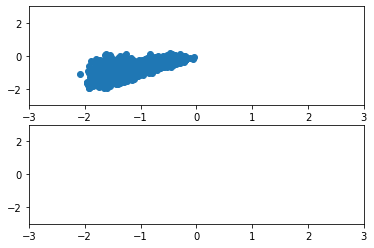

In [11]:
plot_state(init_state,final_state)
print(final_state.max())

## ACMP

In [13]:
opt['function'] = 'ACMP'
opt['method'] = 'dopri5'
opt['time'] = 18
_,_,test_acc,init_state,final_state = main(opt)

True
cuda:0
using ACMP
using ACMP
using Cora dataset


KeyError: 'barrier'

In [6]:
opt['function'] = 'ACMP'
opt['method'] = 'dopri5'
opt['time'] = 50
_,_,test_acc,init_state,final_state = main(opt)

True
using ACMP
using ACMP
Epoch: 001, Runtime 0.444619, Loss 1.948222, forward nfe 116, backward nfe 0, Train: 0.5286, Val: 0.5500, Test: 0.5199, Best time: 14.5957
Epoch: 002, Runtime 0.538288, Loss 1.789718, forward nfe 966, backward nfe 0, Train: 0.5286, Val: 0.5500, Test: 0.5199, Best time: 50.0000
Epoch: 003, Runtime 0.618318, Loss 1.565958, forward nfe 1882, backward nfe 0, Train: 0.8143, Val: 0.6074, Test: 0.6101, Best time: 16.1191
Epoch: 004, Runtime 0.634353, Loss 1.364492, forward nfe 2828, backward nfe 0, Train: 0.8286, Val: 0.7831, Test: 0.7823, Best time: 77.2215
Epoch: 005, Runtime 0.639800, Loss 1.119564, forward nfe 3798, backward nfe 0, Train: 0.8357, Val: 0.7875, Test: 0.7947, Best time: 75.7355
Epoch: 006, Runtime 0.649337, Loss 0.971101, forward nfe 4786, backward nfe 0, Train: 0.8357, Val: 0.7875, Test: 0.7947, Best time: 50.0000
Epoch: 007, Runtime 0.670543, Loss 0.808915, forward nfe 5792, backward nfe 0, Train: 0.8357, Val: 0.7875, Test: 0.7947, Best time: 50.

## Heterophilic Dataset

Texas homophily level: 0.11

In [10]:
opt['dataset'] = 'texas'

opt['function'] = 'GCN'

opt['time'] = 5

opt['beta'] = 0.0

_,_,test_acc,init_state,final_state = main(opt)

True
torch.Size([183, 10])
using GCN
using GCN
Epoch: 001, Runtime 0.193205, Loss 7.090044, forward nfe 86, backward nfe 0, Train: 0.2299, Val: 0.0847, Test: 0.1351, Best time: 5.0000
Epoch: 002, Runtime 0.201734, Loss 176.495010, forward nfe 468, backward nfe 0, Train: 0.2299, Val: 0.3390, Test: 0.1622, Best time: 0.0416
Epoch: 003, Runtime 0.196142, Loss 85.560257, forward nfe 838, backward nfe 0, Train: 0.2299, Val: 0.3390, Test: 0.1622, Best time: 5.0000
Epoch: 004, Runtime 0.200840, Loss 59.713978, forward nfe 1214, backward nfe 0, Train: 0.2299, Val: 0.3390, Test: 0.1622, Best time: 5.0000
Epoch: 005, Runtime 0.199876, Loss 16.672255, forward nfe 1596, backward nfe 0, Train: 0.7471, Val: 0.4915, Test: 0.5135, Best time: 0.0391
Epoch: 006, Runtime 0.199842, Loss 2.553453, forward nfe 1984, backward nfe 0, Train: 0.7586, Val: 0.5424, Test: 0.6757, Best time: 1.1197
Epoch: 007, Runtime 0.204156, Loss 2.505577, forward nfe 2372, backward nfe 0, Train: 0.7586, Val: 0.5424, Test: 0.675

In [6]:
opt['dataset'] = 'texas'
# opt['not_lcc'] = 'False'
opt['function'] = 'ACMP'

opt['time'] = 5

opt['beta'] = 0.5

_,_,test_acc,init_state,final_state = main(opt)

True
torch.Size([183, 10])
using ACMP
using ACMP
Epoch: 001, Runtime 0.088917, Loss 1.568276, forward nfe 38, backward nfe 0, Train: 0.8276, Val: 0.7458, Test: 0.7838, Best time: 1.3983
Epoch: 002, Runtime 0.095202, Loss 1.423147, forward nfe 156, backward nfe 0, Train: 0.8391, Val: 0.7797, Test: 0.7838, Best time: 1.6230
Epoch: 003, Runtime 0.101707, Loss 1.222587, forward nfe 286, backward nfe 0, Train: 0.8391, Val: 0.7797, Test: 0.7838, Best time: 5.0000
Epoch: 004, Runtime 0.111951, Loss 0.982933, forward nfe 428, backward nfe 0, Train: 0.8391, Val: 0.7797, Test: 0.7838, Best time: 5.0000
Epoch: 005, Runtime 0.122745, Loss 0.744253, forward nfe 582, backward nfe 0, Train: 0.8391, Val: 0.7797, Test: 0.7838, Best time: 5.0000
Epoch: 006, Runtime 0.126677, Loss 0.542812, forward nfe 748, backward nfe 0, Train: 0.8391, Val: 0.7797, Test: 0.7838, Best time: 5.0000
Epoch: 007, Runtime 0.139416, Loss 0.444855, forward nfe 932, backward nfe 0, Train: 0.8391, Val: 0.7797, Test: 0.7838, Best

# $\beta$ ablation study

True
torch.Size([183, 10])
using ACMP
using ACMP
Epoch: 001, Runtime 0.128442, Loss 1.571433, forward nfe 38, backward nfe 0, Train: 0.5402, Val: 0.5254, Test: 0.6486, Best time: 5.0000
Epoch: 002, Runtime 0.169291, Loss 1.480924, forward nfe 288, backward nfe 0, Train: 0.5402, Val: 0.5254, Test: 0.6486, Best time: 5.0000
Epoch: 003, Runtime 0.169866, Loss 1.259138, forward nfe 532, backward nfe 0, Train: 0.7701, Val: 0.5763, Test: 0.5946, Best time: 5.0000
Epoch: 004, Runtime 0.192499, Loss 1.001834, forward nfe 794, backward nfe 0, Train: 0.8391, Val: 0.7119, Test: 0.7027, Best time: 6.3827
Epoch: 005, Runtime 0.192070, Loss 0.876789, forward nfe 1068, backward nfe 0, Train: 0.8391, Val: 0.7119, Test: 0.7027, Best time: 5.0000
Epoch: 006, Runtime 0.208755, Loss 0.762516, forward nfe 1366, backward nfe 0, Train: 0.8391, Val: 0.7119, Test: 0.7027, Best time: 5.0000
Epoch: 007, Runtime 0.214738, Loss 0.666319, forward nfe 1664, backward nfe 0, Train: 0.8391, Val: 0.7119, Test: 0.7027, B

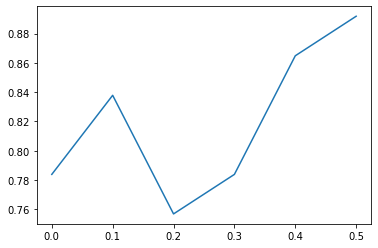

In [9]:
opt['dataset'] = 'texas'

opt['function'] = 'ACMP'
opt['epoch'] = 50
opt['time'] = 5

opt['beta'] = 0.5
test_acc = []
for beta in [0.0,0.1,0.2,0.3,0.4,0.5]:
    opt['beta'] = beta
    _,_,test_acc_,_,_ = main(opt)
    test_acc.append(test_acc_)

import matplotlib.pyplot as plt
plt.plot( [0.0,0.1,0.2,0.3,0.4,0.5],test_acc)

The baseline model and code is from twitter-research: https://github.com/twitter-research/graph-neural-pde



Chamberlain, Ben, et al. "Grand: Graph neural diffusion." International Conference on Machine Learning. PMLR, 2021.
